# Sales Prediction 
(Simple Linear Regression)

# Problem Satement

Build a model which predicts sales based on the money spent on different platforms for marketing.

In [1]:
#importing libraries
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [2]:
ad_df=pd.read_csv('advertising.csv')
ad_df.head()

<IPython.core.display.Javascript object>

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


this dataset having no null values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

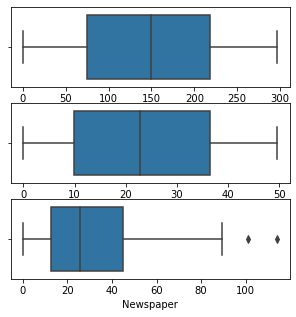

In [4]:
#outlier analysis
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(ad_df['TV'],ax=axs[0])
plt2=sns.boxplot(ad_df['Radio'],ax=axs[1])
plt3=sns.boxplot(ad_df['Newspaper'],ax=axs[2])

 There is no considerable outliers in the data

<IPython.core.display.Javascript object>

<AxesSubplot:>

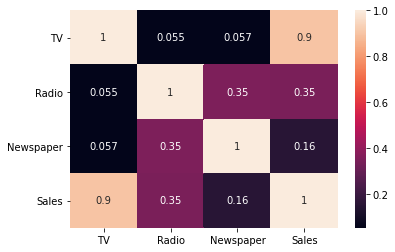

In [5]:
sns.heatmap(ad_df.corr(),annot=True)

from the above plot we can observe that attribute TV is highly correlated with  Sales

<IPython.core.display.Javascript object>

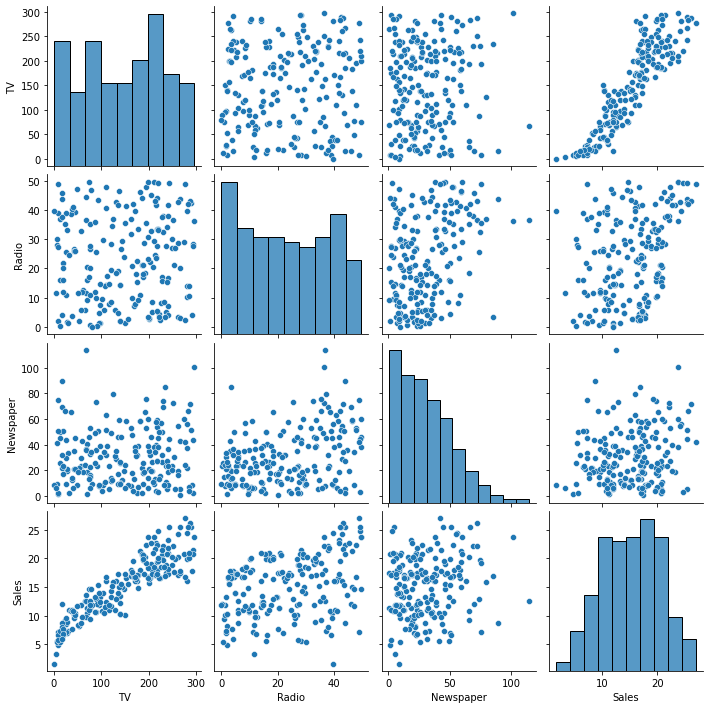

In [6]:
sns.pairplot(ad_df,kind='scatter')

The attribute TV is highly correlated with our taget value Sales ,so we take TV as independent variable

<IPython.core.display.Javascript object>

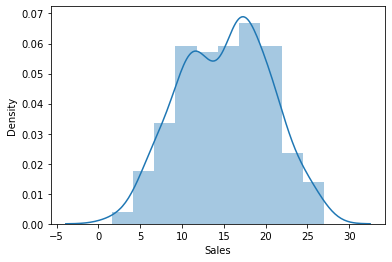

In [7]:
sns.distplot(ad_df['Sales']);

Here the target variable "Sales " is almost normally distributed

In [8]:
x=ad_df['TV']
y=ad_df['Sales']

 splitting the data

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

# Bulding the linear model

By importing statsmodels we can apply OLS linear Regression

In [10]:
import statsmodels.api as sm

In [11]:
# Add a constant to get an intercept
x_train_sm=sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr=sm.OLS(y_train,x_train_sm).fit()

In [12]:
# the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [13]:
# summary for train set
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 26 Jan 2021   Prob (F-statistic):           1.52e-52
Time:                        12:46:44   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

From the above summary:
1. The coefficient for TV is 0.054, with a very low p value 


coefficient is significant. So the association is not purely by chance. 

2. R - squared is 0.816 

Meaning that 81.6% of the variance in Sales is explained by TV
This is a decent R-squared value.

The fit is significant. Let's visualize how well the model fit the data.
From the parameters that we get, our linear regression equation becomes:

𝑆𝑎𝑙𝑒𝑠=6.948+0.054×𝑇𝑉


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

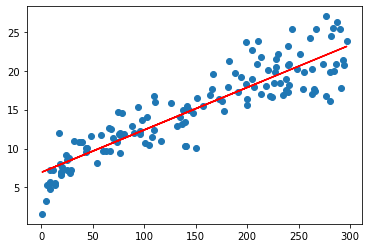

In [14]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.948683+0.054546*x_train,'r')
plt.show()

# Residual Analysis

In [16]:
y_train_pred=lr.predict(x_train_sm)
res=(y_train-y_train_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

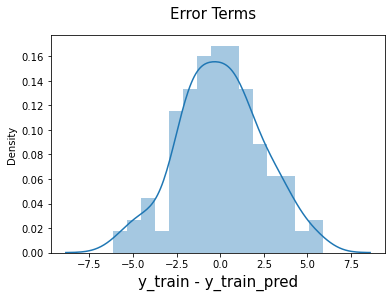

In [17]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

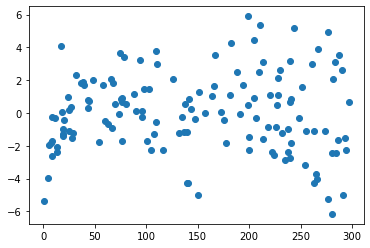

In [18]:
plt.scatter(x_train,res)
plt.show()

In [19]:
x_test_sm=sm.add_constant(x_test)
y_pred=lr.predict(x_test_sm)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

<IPython.core.display.Javascript object>

2.019296008966233

In [22]:
# R sqaured
r_squared=r2_score(y_test,y_pred)
r_squared

0.7921031601245658

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

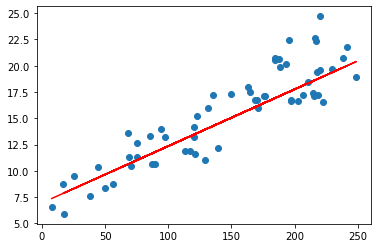

In [23]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()